In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from PIL import Image

In [2]:
image_directory = r'C:/Users/Ziad Sameh/Desktop/DEPI/New folder/test_set'
SIZE = 150
dataset = []
label = []

In [3]:
cat_images = os.listdir(image_directory + '/cats/') # Added a backslash (/) after train.
for i, image_name in enumerate(cat_images):


        image = cv2.imread(image_directory + '/cats/' + image_name) # Added a backslash (/) after train.
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [4]:
dog_images = os.listdir(image_directory + '/dogs/') # Added a backslash (/) after train.
for i, image_name in enumerate(dog_images):


        image = cv2.imread(image_directory + '/dogs/' + image_name) # Added a backslash (/) after train.
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [5]:
dataset = np.array(dataset)
label = np.array(label)

In [6]:
from sklearn.model_selection import train_test_split


X, X_test, y, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2)

In [27]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((1294, 150, 150, 3),
 (1294,),
 (324, 150, 150, 3),
 (324,),
 (405, 150, 150, 3),
 (405,))

In [11]:
X_train_scaled = X_train / 255
X_valid_scaled = X_valid / 255
X_test_scaled = X_test / 255

In [12]:
X_train_scaled[0][0][0]

array([0.27058824, 0.30588235, 0.32156863])

In [14]:
num_classes = 1

model = Sequential([
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [16]:
history = model.fit(X_train_scaled, y_train, epochs=25
                     ,validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 661ms/step - accuracy: 0.5225 - loss: 0.7923 - val_accuracy: 0.6481 - val_loss: 0.6787
Epoch 2/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 28s 680ms/step - accuracy: 0.6065 - loss: 0.6698 - val_accuracy: 0.5617 - val_loss: 0.6801
Epoch 3/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 27s 667ms/step - accuracy: 0.6259 - loss: 0.6558 - val_accuracy: 0.5772 - val_loss: 0.6714
Epoch 4/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 28s 671ms/step - accuracy: 0.6561 - loss: 0.6319 - val_accuracy: 0.5741 - val_loss: 0.6603
Epoch 5/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 26s 626ms/step - accuracy: 0.6907 - loss: 0.5832 - val_accuracy: 0.5926 - val_loss: 0.6971
Epoch 6/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 27s 652ms/step - accuracy: 0.7452 - loss: 0.5272 - val_accuracy: 0.6327 - val_loss: 0.6499
Epoch 7/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 30s 729ms/step - accuracy: 0.7964 - loss: 0.4587 - val_accuracy: 0.6327 - val_loss: 0.7357
Epoch 8/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 27s 665ms/step - accuracy: 0.8399 - loss: 0.3703 - val_accu

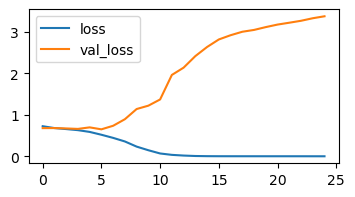

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.DataFrame(history.history)
ind=[1,3]
df.iloc[:,ind].plot(figsize=(4, 2))

plt.show()

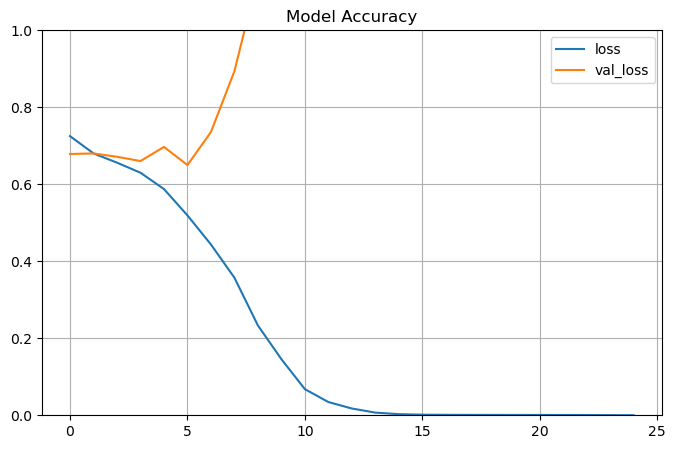

In [18]:
df= pd.DataFrame(history.history)
ind=[1,3]
df.iloc[:,ind].plot(figsize=(8, 5))
plt.title('Model Accuracy')
 # Set x-ticks to be the epoch numbers
plt.ylim(0, 1)  # Set y-limits from 0 to 1
plt.legend()
plt.grid()
plt.show()

In [20]:
model.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - accuracy: 0.6246 - loss: 743.3960


[692.6161499023438, 0.644444465637207]

## With Earlystopping

In [21]:
model1 = Sequential([
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='sigmoid')
])

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
callback = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)

history1 = model1.fit(X_train_scaled, y_train, epochs=25
                     ,validation_data=(X_valid_scaled, y_valid),callbacks=[callback])


Epoch 1/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 35s 656ms/step - accuracy: 0.4849 - loss: 0.7655 - val_accuracy: 0.4660 - val_loss: 0.6933
Epoch 2/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 26s 623ms/step - accuracy: 0.5078 - loss: 0.6931 - val_accuracy: 0.4660 - val_loss: 0.6933
Epoch 3/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 25s 607ms/step - accuracy: 0.5104 - loss: 0.6931 - val_accuracy: 0.4660 - val_loss: 0.6933
Epoch 4/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 27s 657ms/step - accuracy: 0.4823 - loss: 0.6933 - val_accuracy: 0.4660 - val_loss: 0.6933
Epoch 5/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 25s 612ms/step - accuracy: 0.5095 - loss: 0.6931 - val_accuracy: 0.4660 - val_loss: 0.6934


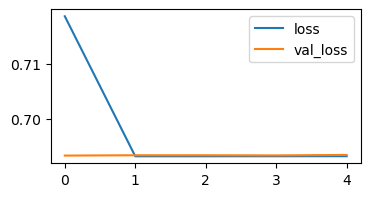

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.DataFrame(history1.history)
ind=[1,3]
df.iloc[:,ind].plot(figsize=(4, 2))

plt.show()

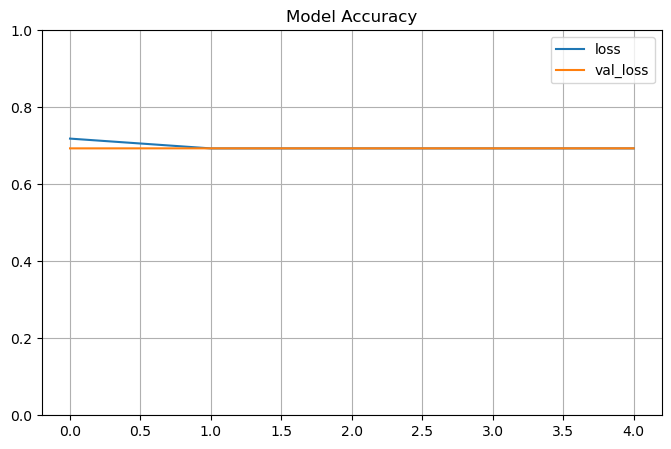

In [24]:
df= pd.DataFrame(history1.history)
ind=[1,3]
df.iloc[:,ind].plot(figsize=(8, 5))
plt.title('Model Accuracy')
 # Set x-ticks to be the epoch numbers
plt.ylim(0, 1)  # Set y-limits from 0 to 1
plt.legend()
plt.grid()
plt.show()

In [25]:
model1.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.4844 - loss: 0.9407


[0.9022829532623291, 0.5037037134170532]